# Vocal tract modelling

In this notebook, the geometry of a vocal tract will be inferred using the boundary element method (BEM) and a genetic algorithm. First, the BEM will be used to build an acoustic model of a vocal tract. 

In [1]:
include("../BEM_base.jl"); # The BEM algorithms are defined in the BEM_base

In [2]:
# Set the msh file location
file = "../dados/vocal_tract/vocal_tract_A_bothclosed.msh";
# Build the domain points
L = 140; # Length of the vocal tract
n_pint = 50; # Number of domain points
PONTOS_int = zeros(n_pint,4);
delta = 1; # distance from both ends 
step = (L-2*delta)/(n_pint-1);
for i = 1:n_pint
    PONTOS_int[i,:] = [i 0 0 delta+(i-1)*step];
end
# Set the boundary conditions for each face. Vowel /A/ model has 30 faces
BCFace = ones(30,3);
BCFace[:,3] = 0;
BCFace[1,:] = [1 0 -1]; # Neumann (flux = 1) to the Glotis
BCFace[30,:] = [30 0 0]; # Dirichlet (pressure = 0) to the mouth
CW = 343*1000; # Speed of sound in mm/s
k = 774/CW/2/pi; # Set the wavenumber
# Solve the BEM model
u,q,uint,qint = BEM_base(file,PONTOS_int,BCFace,k, "wave");

Importing mesh...
  7.523047 seconds (717.68 k allocations: 37.792 MiB, 0.22% gc time)
Building G and H matrices...
 11.150243 seconds (224.64 M allocations: 10.573 GiB, 16.88% gc time)
Applying boundary conditions to build A and b for the linear system...
  0.355876 seconds (3.95 k allocations: 24.210 MiB, 0.58% gc time)
Solving the linear system...
  1.363596 seconds (401.61 k allocations: 30.392 MiB, 0.65% gc time)
Separating acoustic pressure from flux...
  0.055037 seconds (3.62 k allocations: 222.430 KiB)
Solving for domain points.
  0.751390 seconds (13.65 M allocations: 658.150 MiB, 16.11% gc time)
  1.553837 seconds (31.97 M allocations: 1.196 GiB, 12.91% gc time)


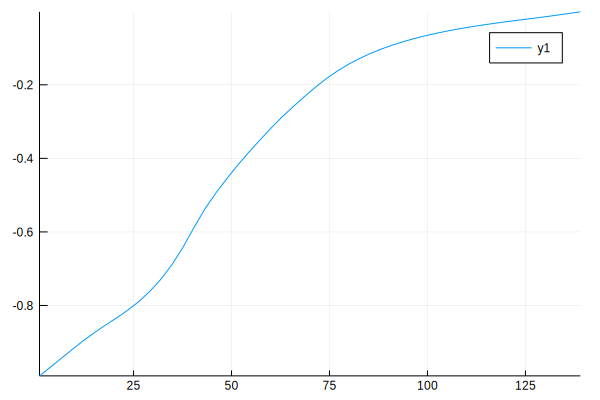

In [8]:
# Graph the results
using Plots
#plot(PONTOS_int[:,4],real(uint),label=L"$\phi$ BEM")
plot(PONTOS_int[:,4],real(uint))
#plot(PONTOS_int[:,4],real(qint),label=L"$q$ BEM")
#grid(1)
#legend()

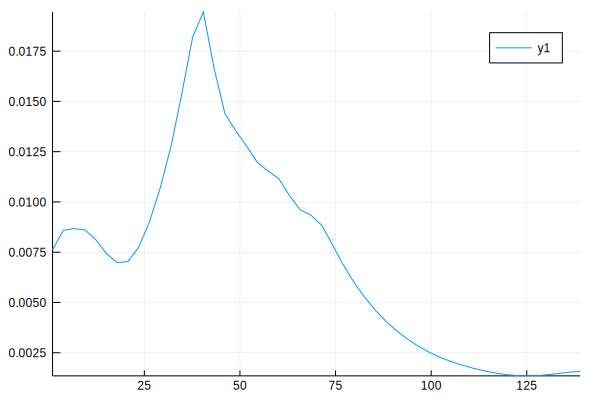

In [11]:
#plot(PONTOS_int[:,4],real(qint),label=L"$q$ BEM")
plot(PONTOS_int[:,4],real(qint))
#grid(1)
#legend()

In [12]:
mshinfo = const3D_tri.lermsh(file,3) #Read the mesh generated 
NOS_GEO,ELEM,elemint,CDC = mshinfo
patch("Faces",ELEM[:,2:4],"Vertices",NOS_GEO[:,2:4],"FaceVertexCData",real(u),"FaceColor","interp")

LoadError: [91mUndefVarError: patch not defined[39m